In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

product_category_name = pd.read_csv(r"product_category_name_translation.csv")

#### Look through each tables in the dataset. There are approximately nine tables in total.

# 1.) olist_customers_dataset

In [2]:
customers = pd.read_csv(r"OLIST-DATA\olist_customers_dataset.csv")
customers

customer_id                customer_unique_id  \
0      06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1      18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2      4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3      b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4      4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   
...                                 ...                               ...   
99436  17ddf5dd5d51696bb3d7c6291687be6f  1a29b476fee25c95fbafc67c5ac95cf8   
99437  e7b71a9017aa05c9a7fd292d714858e8  d52a67c98be1cf6a5c84435bd38d095d   
99438  5e28dfe12db7fb50a4b2f691faecea5e  e9f50caf99f032f0bf3c55141f019d99   
99439  56b18e2166679b8a959d72dd06da27f9  73c2643a0a458b49f58cea58833b192e   
99440  274fa6071e5e17fe303b9748641082c8  84732c5050c01db9b23e19ba39899398   

       customer_zip_code_prefix          customer_city customer_state  
0                         14409                 franca             SP  
1                          9790  sao bernardo do campo             SP  
2                          1151              sao paulo             SP  
3                          8775        mogi das cruzes             SP  
4                         13056               campinas             SP  
...                         ...                    ...            ...  
99436                      3937              sao paulo             SP  
99437                      6764        taboao da serra             SP  
99438                     60115              fortaleza             CE  
99439                     92120                 canoas             RS  
99440                      6703                  cotia             SP  

[99441 rows x 5 columns]

In [3]:
print(customers.isnull().sum())

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64


In [4]:
selected_columns = ['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state']
unique_values_list = [customers[col].unique().tolist() for col in selected_columns]
for i, col in enumerate(selected_columns):
    print(f"Unique values in {col}: {len(unique_values_list[i])} items")

Unique values in customer_id: 99441 items
Unique values in customer_unique_id: 96096 items
Unique values in customer_zip_code_prefix: 14994 items
Unique values in customer_city: 4119 items
Unique values in customer_state: 27 items


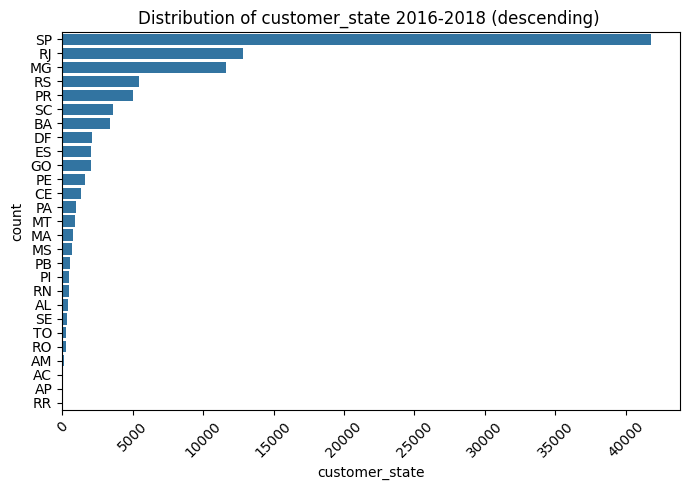

In [5]:
counts = customers['customer_state'].value_counts()  
plt.figure(figsize=(7,5))
sns.barplot(x=counts.values, y=counts.index)
plt.xlabel('customer_state')
plt.ylabel('count')
plt.title('Distribution of customer_state 2016-2018 (descending) ')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ยังไม่ได้ Join เลยยังไม่มีเวลามาเกี่ยวข้อง

In [6]:
counts_city = customers['customer_city'].value_counts().head(20)
plt.figure(figsize=(10,6))
sns.barplot(x=counts_city.values, y=counts_city.index)
plt.xlabel('count')
plt.ylabel('customer_city')
plt.title('Top 20 customer_city by count (2016-2018)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2.) OLIST geolocation

In [7]:
geolocation = pd.read_csv(r"OLIST-DATA\olist_geolocation_dataset.csv")
geolocation

# The freakingly large number of row ?

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                               1037       -23.545621       -46.639292   
1                               1046       -23.546081       -46.644820   
2                               1046       -23.546129       -46.642951   
3                               1041       -23.544392       -46.639499   
4                               1035       -23.541578       -46.641607   
...                              ...              ...              ...   
1000158                        99950       -28.068639       -52.010705   
1000159                        99900       -27.877125       -52.224882   
1000160                        99950       -28.071855       -52.014716   
1000161                        99980       -28.388932       -51.846871   
1000162                        99950       -28.070104       -52.018658   

        geolocation_city geolocation_state  
0              sao paulo                SP  
1              sao paulo                SP  
2              sao paulo                SP  
3              sao paulo                SP  
4              sao paulo                SP  
...                  ...               ...  
1000158         tapejara                RS  
1000159   getulio vargas                RS  
1000160         tapejara                RS  
1000161  david canabarro                RS  
1000162         tapejara                RS  

[1000163 rows x 5 columns]

In [8]:
geolocation_unique_zip = geolocation['geolocation_zip_code_prefix'].nunique()
geolocation_unique_zip

19015

In [9]:
geolocation.groupby('geolocation_zip_code_prefix').size().reset_index(name='counts').sort_values(by='counts', ascending=False)

geolocation_zip_code_prefix  counts
6837                        24220    1146
6838                        24230    1102
9536                        38400     965
8728                        35500     907
4501                        11680     879
...                           ...     ...
91                           1200       1
90                           1189       1
152                          1290       1
151                          1262       1
9763                        39523       1

[19015 rows x 2 columns]

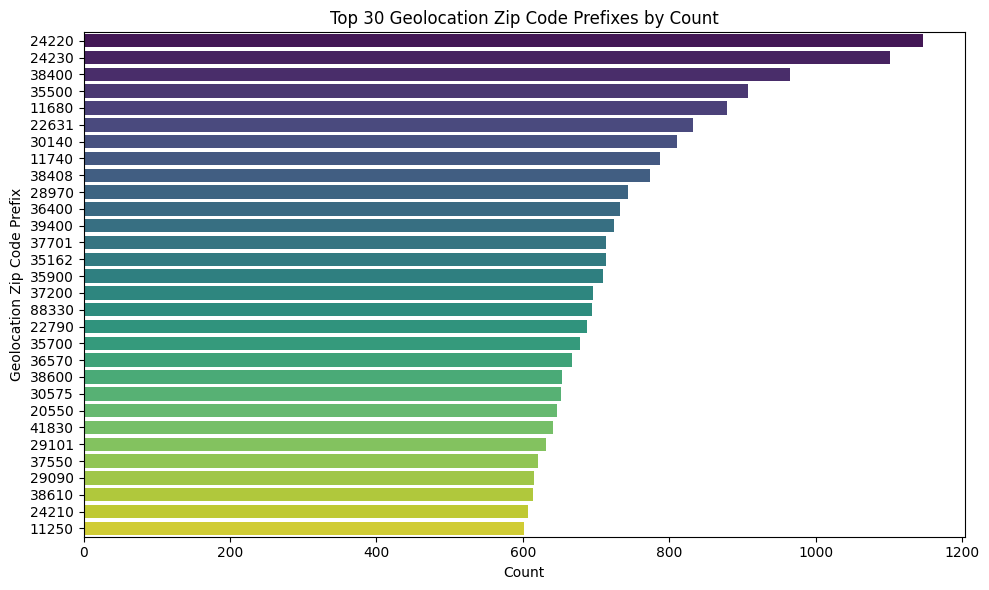

In [10]:
zip_counts = (
    geolocation
    .groupby('geolocation_zip_code_prefix')
    .size()
    .reset_index(name='count')
    .sort_values(by='count', ascending=False)
)

top_n = 30
top_zip = zip_counts.head(top_n).copy()
top_zip['zip_str'] = top_zip['geolocation_zip_code_prefix'].astype(str)

plt.figure(figsize=(10,6))
sns.barplot(data=top_zip, x='count', y='zip_str', hue='zip_str', palette='viridis')
plt.xlabel('Count')
plt.ylabel('Geolocation Zip Code Prefix')
plt.title(f'Top {top_n} Geolocation Zip Code Prefixes by Count')
plt.tight_layout()
plt.show()

In [11]:
zip_list = [24220, 24230, 38400, 11250, 28155]
zip_code = zip_list[4]
df_zip = geolocation[geolocation['geolocation_zip_code_prefix'] == zip_code]

lat_mean = df_zip['geolocation_lat'].mean()
lng_mean = df_zip['geolocation_lng'].mean()
lat_std = df_zip['geolocation_lat'].std()
lng_std = df_zip['geolocation_lng'].std()

print(f"Rows for zip {zip_code}: {len(df_zip)}")
print(f"Latitude  std: {lat_std:.6f}")
print(f"Longitude std: {lng_std:.6f}")

plt.figure(figsize=(14, 4))

# --- Latitude histogram ---
plt.subplot(1, 3, 1)
sns.histplot(df_zip['geolocation_lat'], bins=30, kde=True)
plt.axvline(lat_mean, linestyle='--', linewidth=2, label='Mean')
plt.axvline(lat_mean + lat_std, linestyle=':', linewidth=2, label='+1 Std')
plt.axvline(lat_mean - lat_std, linestyle=':', linewidth=2, label='-1 Std')
plt.xlabel('Latitude')
plt.title('Latitude distribution')
plt.legend()

# --- Longitude histogram ---
plt.subplot(1, 3, 2)
sns.histplot(df_zip['geolocation_lng'], bins=30, kde=True)
plt.axvline(lng_mean, linestyle='--', linewidth=2, label='Mean')
plt.axvline(lng_mean + lng_std, linestyle=':', linewidth=2, label='+1 Std')
plt.axvline(lng_mean - lng_std, linestyle=':', linewidth=2, label='-1 Std')
plt.xlabel('Longitude')
plt.title('Longitude distribution')
plt.legend()

# --- Scatter plot ---
plt.subplot(1, 3, 3)
sns.scatterplot(
    data=df_zip,
    x='geolocation_lng',
    y='geolocation_lat',
    s=20,
    alpha=0.6
)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Latitude vs Longitude')

plt.tight_layout()

plt.show()

## Clearly we need to remove the redundancy in geolocation dataset (via talking mean I guess)

Rows for zip 28155: 5
Latitude  std: 30.597462
Longitude std: 28.007376


In [12]:
print(geolocation.isnull().sum())

# Have são paulo and sao paulo which are the same city need to clean this up.

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64


In [13]:
import folium
from folium.plugins import MarkerCluster

max_points = 10000
data = geolocation.sample(max_points, random_state=1) if len(geolocation) > max_points else geolocation

center = [data['geolocation_lat'].mean(), data['geolocation_lng'].mean()]
m = folium.Map(location=center, zoom_start=5)

cluster = MarkerCluster().add_to(m)
for lat, lng in zip(data['geolocation_lat'], data['geolocation_lng']):
    folium.CircleMarker(location=[lat, lng], radius=1, weight=0, fill=True, fill_opacity=0.6).add_to(cluster)
    
m

# ยังไม่ได้ join เลยทำอะไรมากกว่านี้ไม่ได้

# 3.) olist order items

In [14]:
order_items_dataset = pd.read_csv(r"OLIST-DATA\olist_order_items_dataset.csv")
order_items_dataset

order_id  order_item_id  \
0       00010242fe8c5a6d1ba2dd792cb16214              1   
1       00018f77f2f0320c557190d7a144bdd3              1   
2       000229ec398224ef6ca0657da4fc703e              1   
3       00024acbcdf0a6daa1e931b038114c75              1   
4       00042b26cf59d7ce69dfabb4e55b4fd9              1   
...                                  ...            ...   
112645  fffc94f6ce00a00581880bf54a75a037              1   
112646  fffcd46ef2263f404302a634eb57f7eb              1   
112647  fffce4705a9662cd70adb13d4a31832d              1   
112648  fffe18544ffabc95dfada21779c9644f              1   
112649  fffe41c64501cc87c801fd61db3f6244              1   

                              product_id                         seller_id  \
0       4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1       e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2       c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3       7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4       ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   
...                                  ...                               ...   
112645  4aa6014eceb682077f9dc4bffebc05b0  b8bc237ba3788b23da09c0f1f3a3288c   
112646  32e07fd915822b0765e448c4dd74c828  f3c38ab652836d21de61fb8314b69182   
112647  72a30483855e2eafc67aee5dc2560482  c3cfdc648177fdbbbb35635a37472c53   
112648  9c422a519119dcad7575db5af1ba540e  2b3e4a2a3ea8e01938cabda2a3e5cc79   
112649  350688d9dc1e75ff97be326363655e01  f7ccf836d21b2fb1de37564105216cc1   

        shipping_limit_date   price  freight_value  
0       2017-09-19 09:45:35   58.90          13.29  
1       2017-05-03 11:05:13  239.90          19.93  
2       2018-01-18 14:48:30  199.00          17.87  
3       2018-08-15 10:10:18   12.99          12.79  
4       2017-02-13 13:57:51  199.90          18.14  
...                     ...     ...            ...  
112645  2018-05-02 04:11:01  299.99          43.41  
112646  2018-07-20 04:31:48  350.00          36.53  
112647  2017-10-30 17:14:25   99.90          16.95  
112648  2017-08-21 00:04:32   55.99           8.72  
112649  2018-06-12 17:10:13   43.00          12.79  

[112650 rows x 7 columns]

In [15]:
interested_product_id = "d6fe3b4ddecd4a8393c6a1385de3bfb6"
filtered_rows = order_items_dataset[order_items_dataset["product_id"] == interested_product_id]
filtered_rows

# Same product_id appears in multiple orders
# Price depends on time

order_id  order_item_id  \
746     01ba82170ebb683c73793bb809bbf1b9              1   
747     01ba82170ebb683c73793bb809bbf1b9              2   
748     01ba82170ebb683c73793bb809bbf1b9              3   
3524    07fc346abda30b632be799f5b4be2bd8              1   
9721    164935244f7bc83874bad6ca0150ebd1              1   
12627   1ca238d5d47be7f4da4d8d22f33ed7ca              1   
12628   1ca238d5d47be7f4da4d8d22f33ed7ca              2   
12629   1ca238d5d47be7f4da4d8d22f33ed7ca              3   
26598   3c845174981c9b87340aa1ce5ef7fc9e              1   
27883   3f708b582c7040dabf08966da9400649              1   
27905   3f75bd7be63d165465c46b981942582a              1   
30768   45d6496459628cafb729eca97ed10f4b              1   
49367   70265e39902a914077a038864209d3c6              1   
61105   8b486b19bcb4db26c3e24a6e6d4e2e39              1   
61106   8b486b19bcb4db26c3e24a6e6d4e2e39              2   
61108   8b486b19bcb4db26c3e24a6e6d4e2e39              4   
61109   8b486b19bcb4db26c3e24a6e6d4e2e39              5   
62550   8ed9bbf52d875aa480a636c3cc1b6dc5              1   
64581   938e24f88fdcd624734b6ba10ffdde6a              1   
75758   ac8189e5e0b236fb91fbd04c3975b750              1   
75759   ac8189e5e0b236fb91fbd04c3975b750              2   
92222   d14713175ab3ff245a441613d7242f3b              1   
99411   e17d2e2d4c3e655845a5ed84c9409490              1   
101379  e5f5689b67b74eb43cb33677b9595f5d              1   
101380  e5f5689b67b74eb43cb33677b9595f5d              2   
101381  e5f5689b67b74eb43cb33677b9595f5d              3   
101382  e5f5689b67b74eb43cb33677b9595f5d              4   
101383  e5f5689b67b74eb43cb33677b9595f5d              5   
107293  f3d15fc6394b30a6a35e4c3886208777              1   
107846  f5189c5469aa331b59de00b9af4ce5dd              1   
109403  f8a7ddc8ce9090a2647d48daecae3a24              1   

                              product_id                         seller_id  \
746     d6fe3b4ddecd4a8393c6a1385de3bfb6  7c67e1448b00f6e969d365cea6b010ab   
747     d6fe3b4ddecd4a8393c6a1385de3bfb6  7c67e1448b00f6e969d365cea6b010ab   
748     d6fe3b4ddecd4a8393c6a1385de3bfb6  7c67e1448b00f6e969d365cea6b010ab   
3524    d6fe3b4ddecd4a8393c6a1385de3bfb6  7c67e1448b00f6e969d365cea6b010ab   
9721    d6fe3b4ddecd4a8393c6a1385de3bfb6  7c67e1448b00f6e969d365cea6b010ab   
12627   d6fe3b4ddecd4a8393c6a1385de3bfb6  7c67e1448b00f6e969d365cea6b010ab   
12628   d6fe3b4ddecd4a8393c6a1385de3bfb6  7c67e1448b00f6e969d365cea6b010ab   
12629   d6fe3b4ddecd4a8393c6a1385de3bfb6  7c67e1448b00f6e969d365cea6b010ab   
26598   d6fe3b4ddecd4a8393c6a1385de3bfb6  7c67e1448b00f6e969d365cea6b010ab   
27883   d6fe3b4ddecd4a8393c6a1385de3bfb6  7c67e1448b00f6e969d365cea6b010ab   
27905   d6fe3b4ddecd4a8393c6a1385de3bfb6  7c67e1448b00f6e969d365cea6b010ab   
30768   d6fe3b4ddecd4a8393c6a1385de3bfb6  7c67e1448b00f6e969d365cea6b010ab   
49367   d6fe3b4ddecd4a8393c6a1385de3bfb6  7c67e1448b00f6e969d365cea6b010ab   
61105   d6fe3b4ddecd4a8393c6a1385de3bfb6  7c67e1448b00f6e969d365cea6b010ab   
61106   d6fe3b4ddecd4a8393c6a1385de3bfb6  7c67e1448b00f6e969d365cea6b010ab   
61108   d6fe3b4ddecd4a8393c6a1385de3bfb6  7c67e1448b00f6e969d365cea6b010ab   
61109   d6fe3b4ddecd4a8393c6a1385de3bfb6  7c67e1448b00f6e969d365cea6b010ab   
62550   d6fe3b4ddecd4a8393c6a1385de3bfb6  7c67e1448b00f6e969d365cea6b010ab   
64581   d6fe3b4ddecd4a8393c6a1385de3bfb6  7c67e1448b00f6e969d365cea6b010ab   
75758   d6fe3b4ddecd4a8393c6a1385de3bfb6  7c67e1448b00f6e969d365cea6b010ab   
75759   d6fe3b4ddecd4a8393c6a1385de3bfb6  7c67e1448b00f6e969d365cea6b010ab   
92222   d6fe3b4ddecd4a8393c6a1385de3bfb6  7c67e1448b00f6e969d365cea6b010ab   
99411   d6fe3b4ddecd4a8393c6a1385de3bfb6  7c67e1448b00f6e969d365cea6b010ab   
101379  d6fe3b4ddecd4a8393c6a1385de3bfb6  7c67e1448b00f6e969d365cea6b010ab   
101380  d6fe3b4ddecd4a8393c6a1385de3bfb6  7c67e1448b00f6e969d365cea6b010ab   
101381  d6fe3b4ddecd4a8393c6a1385de3bfb6  7c67e1448b00f6e969d365cea6b010ab   
101382  d6fe3b4ddecd4a8393c6a1385de3b

In [16]:
print(order_items_dataset.isnull().sum())

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64


# 4.) olist order payments dataset

In [17]:
order_payments_dataset = pd.read_csv(r"OLIST-DATA\olist_order_payments_dataset.csv")
order_payments_dataset

order_id  payment_sequential payment_type  \
0       b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1       a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2       25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3       ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4       42fdf880ba16b47b59251dd489d4441a                   1  credit_card   
...                                  ...                 ...          ...   
103881  0406037ad97740d563a178ecc7a2075c                   1       boleto   
103882  7b905861d7c825891d6347454ea7863f                   1  credit_card   
103883  32609bbb3dd69b3c066a6860554a77bf                   1  credit_card   
103884  b8b61059626efa996a60be9bb9320e10                   1  credit_card   
103885  28bbae6599b09d39ca406b747b6632b1                   1       boleto   

        payment_installments  payment_value  
0                          8          99.33  
1                          1          24.39  
2                          1          65.71  
3                          8         107.78  
4                          2         128.45  
...                      ...            ...  
103881                     1         363.31  
103882                     2          96.80  
103883                     1          47.77  
103884                     5         369.54  
103885                     1         191.58  

[103886 rows x 5 columns]

In [18]:
selected_columns = ['payment_type', 'payment_installments']
unique_values_list = [order_payments_dataset[col].unique().tolist() for col in selected_columns]
for i, col in enumerate(selected_columns):
    print(f"Unique values in {col}: {len(unique_values_list[i])} items")

Unique values in payment_type: 5 items
Unique values in payment_installments: 24 items


In [19]:
order_id = "009ac365164f8e06f59d18a08045f6c4"
filtered_order = order_payments_dataset[order_payments_dataset["order_id"] == order_id].sort_values(by="payment_sequential")
filtered_order

# One order can have multiple payments.

order_id  payment_sequential payment_type  \
16053  009ac365164f8e06f59d18a08045f6c4                   1  credit_card   
16459  009ac365164f8e06f59d18a08045f6c4                   2      voucher   
73837  009ac365164f8e06f59d18a08045f6c4                   3      voucher   
32058  009ac365164f8e06f59d18a08045f6c4                   4      voucher   
285    009ac365164f8e06f59d18a08045f6c4                   5      voucher   
15298  009ac365164f8e06f59d18a08045f6c4                   6      voucher   

       payment_installments  payment_value  
16053                     1           0.88  
16459                     1           4.50  
73837                     1           8.25  
32058                     1           5.45  
285                       1           8.75  
15298                     1           4.17

In [20]:
order_id = '88857d91dc3370190060f4b06041e708'
filtered_order = order_payments_dataset[order_payments_dataset["order_id"] == order_id].sort_values(by="payment_sequential")
filtered_order

# จำนวณการแบ่งจ่าย order นี้มี 10 ครั้ง

order_id  payment_sequential payment_type  \
290  88857d91dc3370190060f4b06041e708                   1  credit_card   

     payment_installments  payment_value  
290                    10         185.85

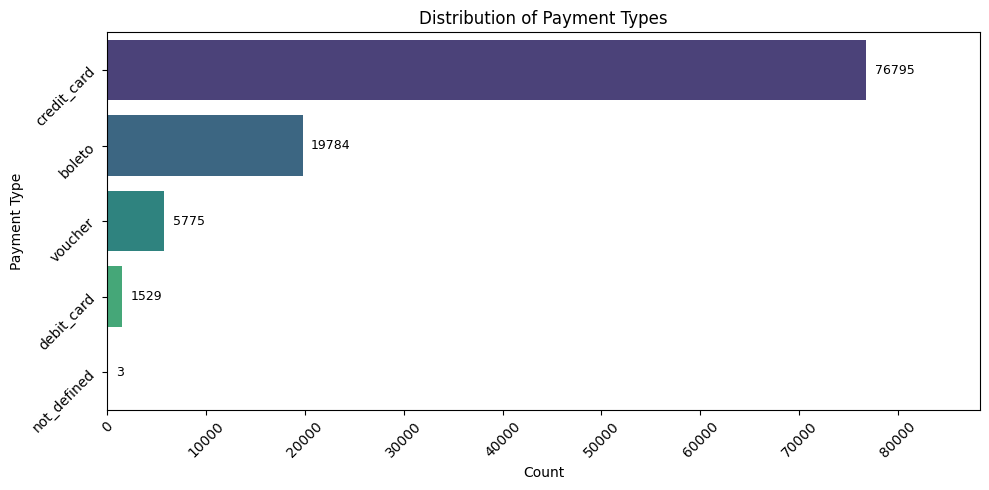

In [21]:
plt.figure(figsize=(10, 5))

payment_counts = (
    order_payments_dataset["payment_type"]
    .value_counts()
    .reset_index()
)
payment_counts.columns = ["payment_type", "count"]

ax = sns.barplot(
    data=payment_counts,
    x="count",
    y="payment_type",
    hue="payment_type",
    palette="viridis",
    legend=False,
)

max_count = payment_counts["count"].max()
ax.set_xlim(0, max_count * 1.15)

for container in ax.containers:
    ax.bar_label(
        container,
        labels=[f"{int(v)}" for v in container.datavalues],
        padding=6,
        label_type="edge",
        fontsize=9
    )

plt.xlabel("Count")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.ylabel("Payment Type")
plt.title("Distribution of Payment Types")

plt.tight_layout()
plt.show()


In [22]:
print(order_payments_dataset.isnull().sum())

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64


# 5.) order reviews dataset

I'm not going to do much with this data yet since it is NLP and more consideration is needed.

In [23]:
order_reviews = pd.read_csv(r"OLIST-DATA\olist_order_reviews_dataset.csv")
order_reviews

review_id                          order_id  \
0      7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1      80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2      228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3      e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4      f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   
...                                 ...                               ...   
99219  574ed12dd733e5fa530cfd4bbf39d7c9  2a8c23fee101d4d5662fa670396eb8da   
99220  f3897127253a9592a73be9bdfdf4ed7a  22ec9f0669f784db00fa86d035cf8602   
99221  b3de70c89b1510c4cd3d0649fd302472  55d4004744368f5571d1f590031933e4   
99222  1adeb9d84d72fe4e337617733eb85149  7725825d039fc1f0ceb7635e3f7d9206   
99223  efe49f1d6f951dd88b51e6ccd4cc548f  90531360ecb1eec2a1fbb265a0db0508   

       review_score review_comment_title  \
0                 4                  NaN   
1                 5                  NaN   
2                 5                  NaN   
3                 5                  NaN   
4                 5                  NaN   
...             ...                  ...   
99219             5                  NaN   
99220             5                  NaN   
99221             5                  NaN   
99222             4                  NaN   
99223             1                  NaN   

                                  review_comment_message review_creation_date  \
0                                                    NaN  2018-01-18 00:00:00   
1                                                    NaN  2018-03-10 00:00:00   
2                                                    NaN  2018-02-17 00:00:00   
3                  Recebi bem antes do prazo estipulado.  2017-04-21 00:00:00   
4      Parabéns lojas lannister adorei comprar pela I...  2018-03-01 00:00:00   
...                                                  ...                  ...   
99219                                                NaN  2018-07-07 00:00:00   
99220                                                NaN  2017-12-09 00:00:00   
99221  Excelente mochila, entrega super rápida. Super...  2018-03-22 00:00:00   
99222                                                NaN  2018-07-01 00:00:00   
99223  meu produto chegou e ja tenho que devolver, po...  2017-07-03 00:00:00   

      review_answer_timestamp  
0         2018-01-18 21:46:59  
1         2018-03-11 03:05:13  
2         2018-02-18 14:36:24  
3         2017-04-21 22:02:06  
4         2018-03-02 10:26:53  
...                       ...  
99219     2018-07-14 17:18:30  
99220     2017-12-11 20:06:42  
99221     2018-03-23 09:10:43  
99222     2018-07-02 12:59:13  
99223     2017-07-03 21:01:49  

[99224 rows x 7 columns]

In [24]:
print(order_reviews.isnull().sum())

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64


# 6.) olist_orders_dataset

In [25]:
olist_orders_dataset = pd.read_csv(r"OLIST-DATA\olist_orders_dataset.csv")
olist_orders_dataset

order_id                       customer_id  \
0      e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1      53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2      47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3      949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4      ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
...                                 ...                               ...   
99436  9c5dedf39a927c1b2549525ed64a053c  39bd1228ee8140590ac3aca26f2dfe00   
99437  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
99438  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
99439  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
99440  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

      order_status order_purchase_timestamp    order_approved_at  \
0        delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1        delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2        delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3        delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4        delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   
...            ...                      ...                  ...   
99436    delivered      2017-03-09 09:54:05  2017-03-09 09:54:05   
99437    delivered      2018-02-06 12:58:58  2018-02-06 13:10:37   
99438    delivered      2017-08-27 14:46:43  2017-08-27 15:04:16   
99439    delivered      2018-01-08 21:28:27  2018-01-08 21:36:21   
99440    delivered      2018-03-08 20:57:30  2018-03-09 11:20:28   

      order_delivered_carrier_date order_delivered_customer_date  \
0              2017-10-04 19:55:00           2017-10-10 21:25:13   
1              2018-07-26 14:31:00           2018-08-07 15:27:45   
2              2018-08-08 13:50:00           2018-08-17 18:06:29   
3              2017-11-22 13:39:59           2017-12-02 00:28:42   
4              2018-02-14 19:46:34           2018-02-16 18:17:02   
...                            ...                           ...   
99436          2017-03-10 11:18:03           2017-03-17 15:08:01   
99437          2018-02-07 23:22:42           2018-02-28 17:37:56   
99438          2017-08-28 20:52:26           2017-09-21 11:24:17   
99439          2018-01-12 15:35:03           2018-01-25 23:32:54   
99440          2018-03-09 22:11:59           2018-03-16 13:08:30   

      order_estimated_delivery_date  
0               2017-10-18 00:00:00  
1               2018-08-13 00:00:00  
2               2018-09-04 00:00:00  
3               2017-12-15 00:00:00  
4               2018-02-26 00:00:00  
...                             ...  
99436           2017-03-28 00:00:00  
99437           2018-03-02 00:00:00  
99438           2017-09-27 00:00:00  
99439           2018-02-15 00:00:00  
99440           2018-04-03 00:00:00  

[99441 rows x 8 columns]

In [26]:
counts = olist_orders_dataset['customer_id'].value_counts()
print(f"Total rows: {len(olist_orders_dataset)}")
print(f"Unique customer_id: {counts.size}")
print(f"Customers with >1 appearance: {(counts>1).sum()}")
print("\nTop 10 customer_id by appearances:")
print(counts.head(10))

Total rows: 99441
Unique customer_id: 99441
Customers with >1 appearance: 0

Top 10 customer_id by appearances:
customer_id
edb027a75a1449115f6b43211ae02a24    1
f00bb12620b7b232233cace1b229db18    1
ad312389a098ceff46ce92c4595c06d0    1
a046c690e0564ffde0ce611b5eee2c30    1
3803547f820b1e10b7ad9c7985f06753    1
6f2cf56878f7f82151b0ad02590192c0    1
ce5efd1b1d8a2fa290a871edd5c26cd6    1
a537aaf902d2f436eb7f44817154bb68    1
2f4a42f9bb4b9a8cd402fa549df5c7fd    1
42b0671b440d1f2527bddd8b723e0a0c    1
Name: count, dtype: int64


In [27]:
print(olist_orders_dataset['order_status'].value_counts(dropna=False))

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64


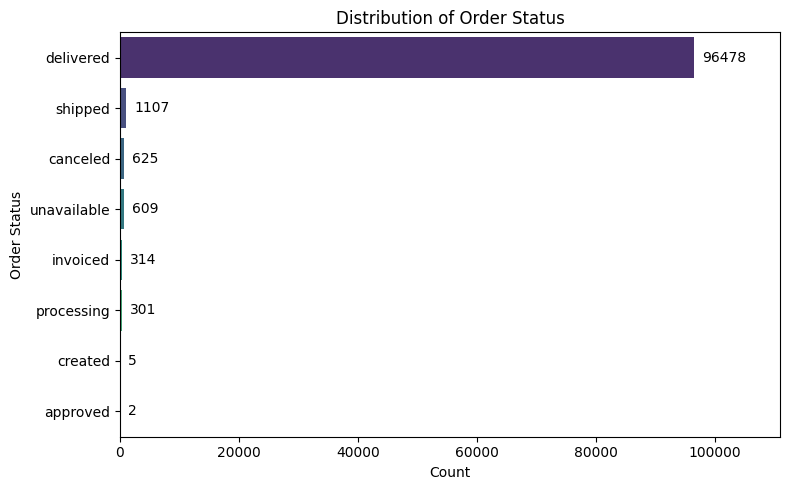

In [28]:
counts = (
    olist_orders_dataset["order_status"]
    .value_counts()
    .reset_index()
)
counts.columns = ["order_status", "count"]

plt.figure(figsize=(8, 5))

ax = sns.barplot(
    data=counts,
    x="count",
    y="order_status",
    hue="order_status",      # REQUIRED for palette
    palette="viridis",
    legend=False,            # prevent duplicate legend
    orient="h"
)

ax.set_xlabel("Count")
ax.set_ylabel("Order Status")
ax.set_title("Distribution of Order Status")

# add value labels
for container in ax.containers:
    ax.bar_label(
        container,
        labels=[f"{int(v)}" for v in container.datavalues],
        padding=6,
        label_type="edge"
    )

# add some space so labels are not clipped
ax.set_xlim(0, counts["count"].max() * 1.15)

plt.tight_layout()
plt.show()

In [29]:
print(olist_orders_dataset.isnull().sum())

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64


# 7.) olist_products_dataset

In [30]:
olist_products_dataset = pd.read_csv(r"OLIST-DATA\olist_products_dataset.csv")
olist_products_dataset

product_id              product_category_name  \
0      1e9e8ef04dbcff4541ed26657ea517e5                         perfumaria   
1      3aa071139cb16b67ca9e5dea641aaa2f                              artes   
2      96bd76ec8810374ed1b65e291975717f                      esporte_lazer   
3      cef67bcfe19066a932b7673e239eb23d                              bebes   
4      9dc1a7de274444849c219cff195d0b71              utilidades_domesticas   
...                                 ...                                ...   
32946  a0b7d5a992ccda646f2d34e418fff5a0                   moveis_decoracao   
32947  bf4538d88321d0fd4412a93c974510e6  construcao_ferramentas_iluminacao   
32948  9a7c6041fa9592d9d9ef6cfe62a71f8c                    cama_mesa_banho   
32949  83808703fc0706a22e264b9d75f04a2e             informatica_acessorios   
32950  106392145fca363410d287a815be6de4                    cama_mesa_banho   

       product_name_lenght  product_description_lenght  product_photos_qty  \
0                     40.0                       287.0                 1.0   
1                     44.0                       276.0                 1.0   
2                     46.0                       250.0                 1.0   
3                     27.0                       261.0                 1.0   
4                     37.0                       402.0                 4.0   
...                    ...                         ...                 ...   
32946                 45.0                        67.0                 2.0   
32947                 41.0                       971.0                 1.0   
32948                 50.0                       799.0                 1.0   
32949                 60.0                       156.0                 2.0   
32950                 58.0                       309.0                 1.0   

       product_weight_g  product_length_cm  product_height_cm  \
0                 225.0               16.0               10.0   
1                1000.0               30.0               18.0   
2                 154.0               18.0                9.0   
3                 371.0               26.0                4.0   
4                 625.0               20.0               17.0   
...                 ...                ...                ...   
32946           12300.0               40.0               40.0   
32947            1700.0               16.0               19.0   
32948            1400.0               27.0                7.0   
32949             700.0               31.0               13.0   
32950            2083.0               12.0                2.0   

       product_width_cm  
0                  14.0  
1                  20.0  
2                  15.0  
3                  26.0  
4                  13.0  
...                 ...  
32946              40.0  
32947              16.0  
32948              27.0  
32949              20.0  
32950               7.0  

[32951 rows x 9 columns]

In [31]:
print(olist_products_dataset.isnull().sum())

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64


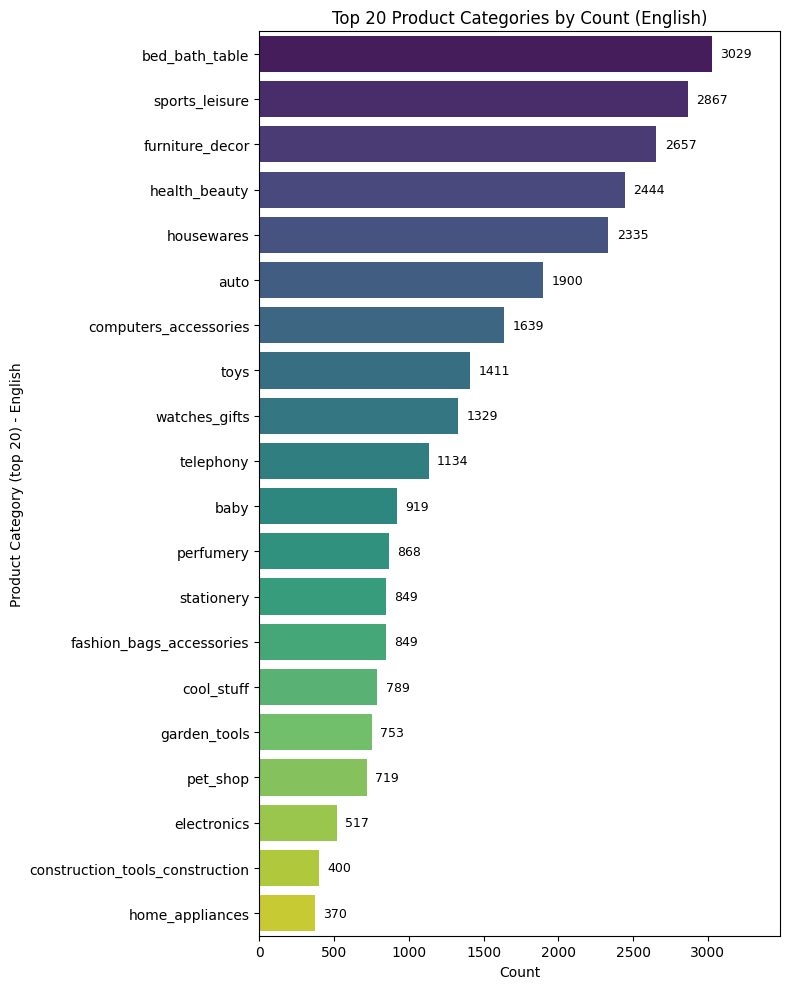

In [32]:
top20 = (
    olist_products_dataset["product_category_name"]
    .value_counts()
    .nlargest(20)
    .reset_index()
)
mapping_df = product_category_name  
top20_en = top20.merge(mapping_df, on='product_category_name', how='left')
top20_en['product_category_name_english'] = top20_en['product_category_name_english'].fillna(top20_en['product_category_name'])

order_en = top20_en['product_category_name_english'].tolist()

plt.figure(figsize=(8, 10))
ax = sns.barplot(
    data=top20_en,
    x="count",
    y="product_category_name_english",
    order=order_en,
    hue="product_category_name_english",
    palette="viridis",
    legend=False,
    orient="h"
)

ax.set_xlim(0, top20_en["count"].max() * 1.15)

for container in ax.containers:
    try:
        labels = [f"{int(v)}" for v in container.datavalues]
    except AttributeError:
        labels = [f"{int(p.get_width())}" for p in container]
    ax.bar_label(container, labels=labels, padding=6, label_type="edge", fontsize=9)

ax.set_xlabel("Count")
ax.set_ylabel("Product Category (top 20) - English")
ax.set_title("Top 20 Product Categories by Count (English)")
plt.tight_layout()
plt.show()


# 8.) olist_sellers_dataset

In [33]:
olist_sellers_dataset = pd.read_csv(r"OLIST-DATA\olist_sellers_dataset.csv")
olist_sellers_dataset

seller_id  seller_zip_code_prefix  \
0     3442f8959a84dea7ee197c632cb2df15                   13023   
1     d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
2     ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
3     c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
4     51a04a8a6bdcb23deccc82b0b80742cf                   12914   
...                                ...                     ...   
3090  98dddbc4601dd4443ca174359b237166                   87111   
3091  f8201cab383e484733266d1906e2fdfa                   88137   
3092  74871d19219c7d518d0090283e03c137                    4650   
3093  e603cf3fec55f8697c9059638d6c8eb5                   96080   
3094  9e25199f6ef7e7c347120ff175652c3b                   12051   

            seller_city seller_state  
0              campinas           SP  
1            mogi guacu           SP  
2        rio de janeiro           RJ  
3             sao paulo           SP  
4     braganca paulista           SP  
...                 ...          ...  
3090            sarandi           PR  
3091            palhoca           SC  
3092          sao paulo           SP  
3093            pelotas           RS  
3094            taubate           SP  

[3095 rows x 4 columns]

In [34]:
olist_sellers_dataset['seller_id'].nunique()

3095

In [39]:
3095-571

2524

In [35]:
# find sellers with exactly one unique order (one sale)
seller_order_counts = (
    order_items_dataset
    .groupby('seller_id')['order_id']
    .nunique()
    .reset_index(name='order_count')
)

single_sale_sellers = seller_order_counts[seller_order_counts['order_count'] == 1]

print(f"Sellers with only one sale: {len(single_sale_sellers)}")

# merge to get seller details
single_sale_sellers_info = single_sale_sellers.merge(olist_sellers_dataset, on='seller_id', how='left')
single_sale_sellers_info.sort_values('seller_id').reset_index(drop=True)

Sellers with only one sale: 571


seller_id  order_count  seller_zip_code_prefix  \
0    001e6ad469a905060d959994f1b41e4f            1                   24754   
1    003554e2dce176b5555353e4f3555ac8            1                   74565   
2    00ab3eff1b5192e5f1a63bcecfee11c8            1                    4164   
3    00d8b143d12632bad99c0ad66ad52825            1                   30170   
4    010da0602d7774602cd1b3f5fb7b709e            1                    9710   
..                                ...          ...                     ...   
566  fe9d9cf8631285d5982c6e2cf27fb114            1                   36200   
567  feb793c88d836c3a75efa4b5a3465d70            1                    3165   
568  fec6912baad85d41729669edd6b4d3b8            1                   14110   
569  fedaedd3ca31d56ab33e92035e4b361c            1                   24310   
570  ffcfefa19b08742c5d315f2791395ee5            1                   80045   

                 seller_city seller_state  
0                sao goncalo           RJ  
1                    goiania           GO  
2                  sao paulo           SP  
3             belo horizonte           MG  
4      sao bernardo do campo           SP  
..                       ...          ...  
566  barbacena/ minas gerais           MG  
567                sao paulo           SP  
568           ribeirao preto           SP  
569                  niteroi           RJ  
570                 curitiba           PR  

[571 rows x 5 columns]

In [36]:
print(olist_sellers_dataset.isnull().sum())

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64


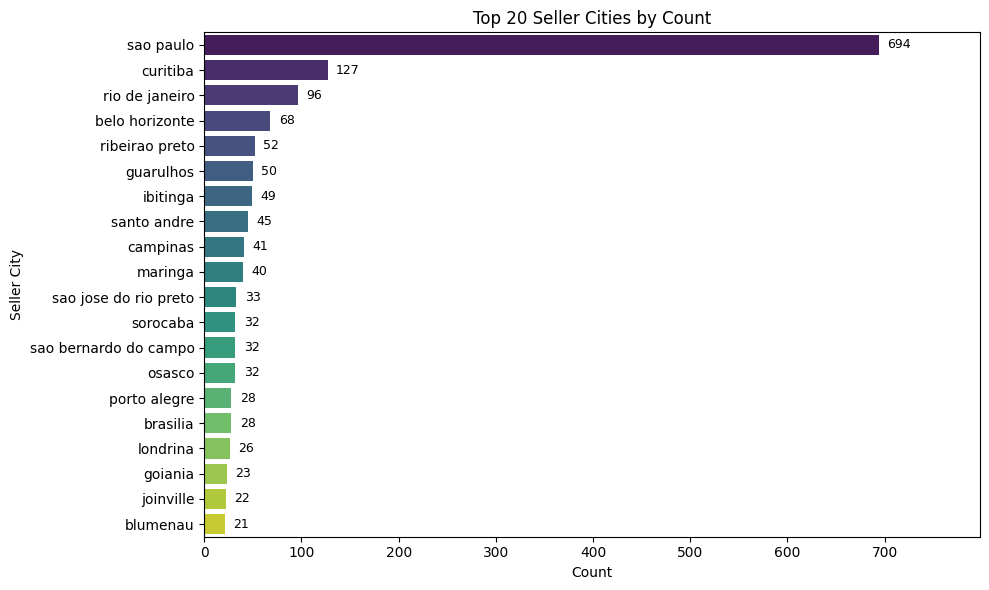

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# prepare top 20
counts_seller_city = (
    olist_sellers_dataset["seller_city"]
    .value_counts()
    .head(20)
    .reset_index()
)
counts_seller_city.columns = ["seller_city", "count"]

plt.figure(figsize=(10, 6))

ax = sns.barplot(
    data=counts_seller_city,
    x="count",
    y="seller_city",
    hue="seller_city",     # required for palette in seaborn >= 0.14
    palette="viridis",
    legend=False,
    orient="h"
)

ax.set_xlabel("Count")
ax.set_ylabel("Seller City")
ax.set_title("Top 20 Seller Cities by Count")

# optional: add value labels
ax.set_xlim(0, counts_seller_city["count"].max() * 1.15)
for container in ax.containers:
    ax.bar_label(
        container,
        labels=[f"{int(v)}" for v in container.datavalues],
        padding=6,
        label_type="edge",
        fontsize=9
    )

plt.tight_layout()
plt.show()


# Extra

In [38]:
product_category_name = pd.read_csv(r"product_category_name_translation.csv")
product_category_name

product_category_name product_category_name_english
0                    beleza_saude                 health_beauty
1          informatica_acessorios         computers_accessories
2                      automotivo                          auto
3                 cama_mesa_banho                bed_bath_table
4                moveis_decoracao               furniture_decor
..                            ...                           ...
66                         flores                       flowers
67             artes_e_artesanato         arts_and_craftmanship
68                fraldas_higiene           diapers_and_hygiene
69  fashion_roupa_infanto_juvenil     fashion_childrens_clothes
70             seguros_e_servicos         security_and_services

[71 rows x 2 columns]